In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures


In [66]:
df = pd.read_csv(r"C:\Users\71589\Desktop\Fish.csv") # Load CSV file with the file path 
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [67]:
df.info() # Display concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


<Axes: >

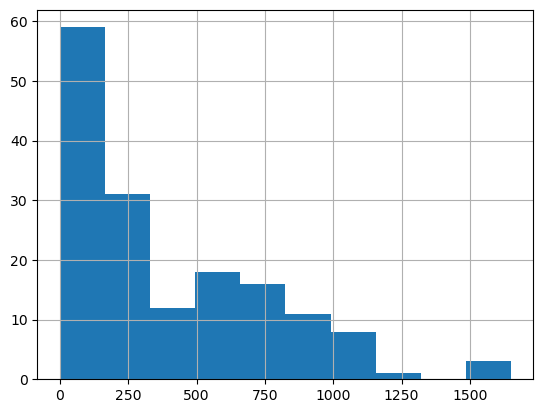

In [68]:
df.Weight.hist()

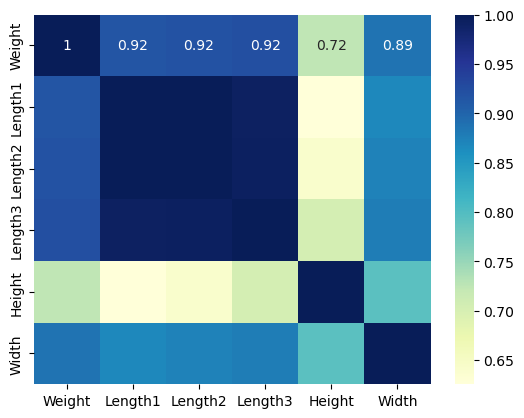

In [69]:
corr = df.select_dtypes(include=np.number).corr()
dataplot = sb.heatmap(corr,  annot=True, cmap="YlGnBu") # cmap="YlGnBu",
plt.show()

C:\Users\71589\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71589\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71589\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71589\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

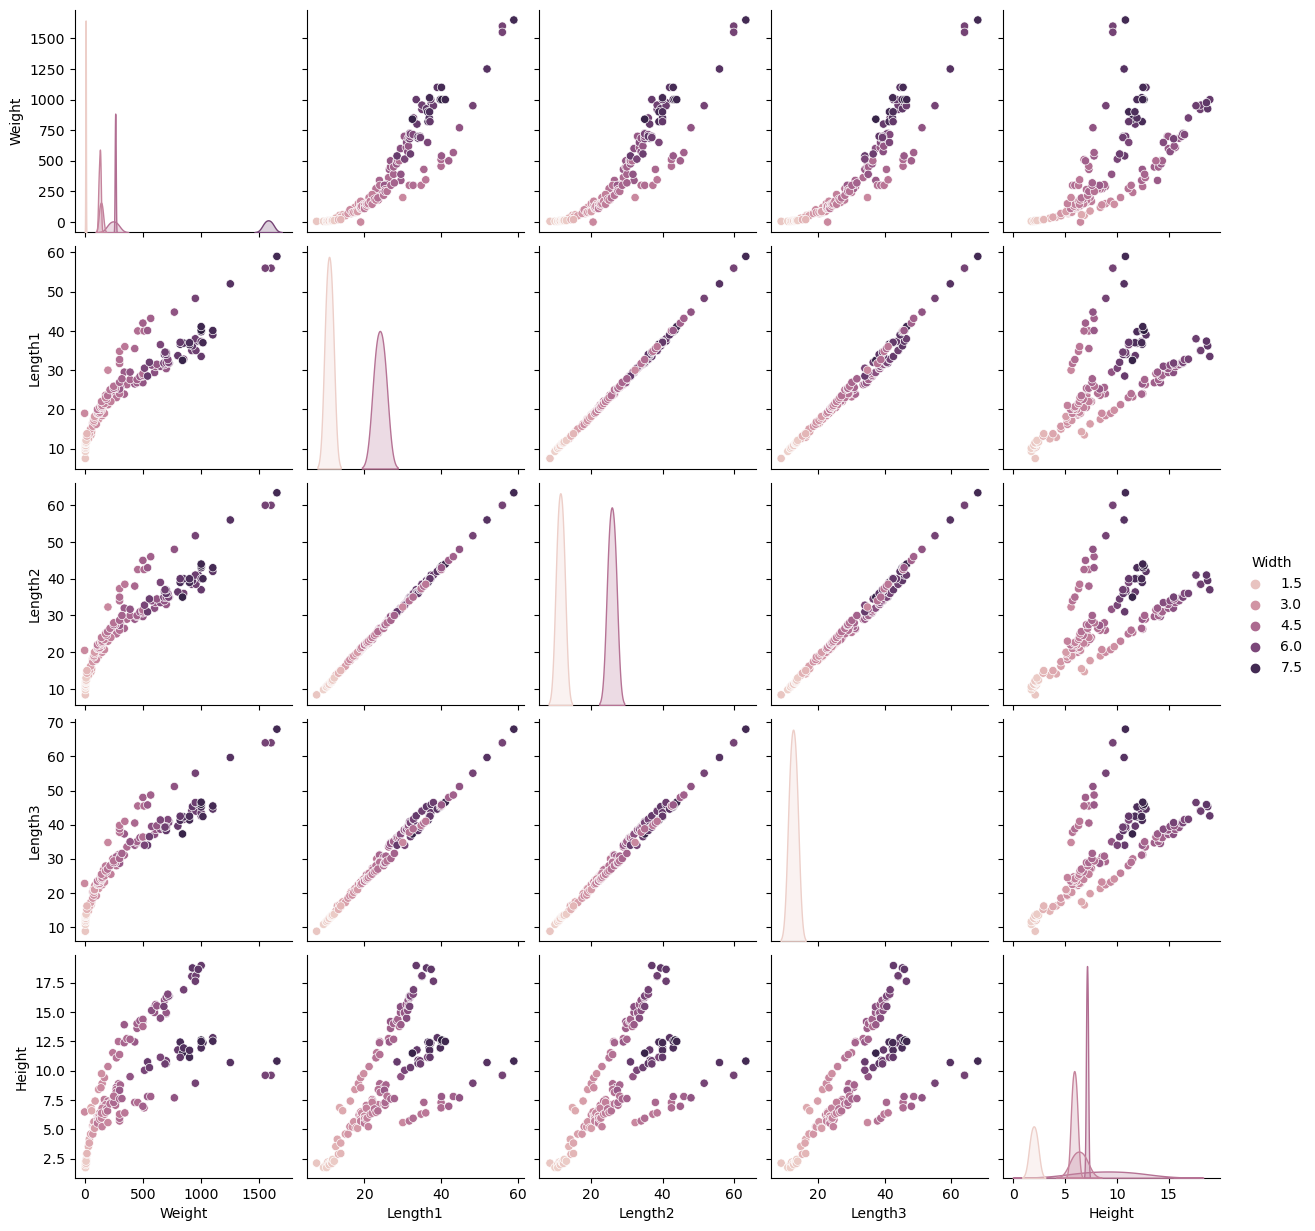

In [70]:
# pairplot with hue sex
sb.pairplot(df, hue="Width")
# to show
plt.show()

In [71]:
categorical = df.select_dtypes(exclude = np.number).columns
categorical

Index(['Species'], dtype='object')

In [72]:
df1 = df.copy()
classes = dict()
le = LabelEncoder()
for col in categorical:
    df1[col]= le.fit_transform(df1[col])
    classes[col] = le.classes_

In [73]:
df1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [74]:
X = df1.drop(columns = 'Species').values # Drop the 'Premium' column and convert the remaining DataFrame to a NumPy array

X

array([[2.42000e+02, 2.32000e+01, 2.54000e+01, 3.00000e+01, 1.15200e+01,
        4.02000e+00],
       [2.90000e+02, 2.40000e+01, 2.63000e+01, 3.12000e+01, 1.24800e+01,
        4.30560e+00],
       [3.40000e+02, 2.39000e+01, 2.65000e+01, 3.11000e+01, 1.23778e+01,
        4.69610e+00],
       [3.63000e+02, 2.63000e+01, 2.90000e+01, 3.35000e+01, 1.27300e+01,
        4.45550e+00],
       [4.30000e+02, 2.65000e+01, 2.90000e+01, 3.40000e+01, 1.24440e+01,
        5.13400e+00],
       [4.50000e+02, 2.68000e+01, 2.97000e+01, 3.47000e+01, 1.36024e+01,
        4.92740e+00],
       [5.00000e+02, 2.68000e+01, 2.97000e+01, 3.45000e+01, 1.41795e+01,
        5.27850e+00],
       [3.90000e+02, 2.76000e+01, 3.00000e+01, 3.50000e+01, 1.26700e+01,
        4.69000e+00],
       [4.50000e+02, 2.76000e+01, 3.00000e+01, 3.51000e+01, 1.40049e+01,
        4.84380e+00],
       [5.00000e+02, 2.85000e+01, 3.07000e+01, 3.62000e+01, 1.42266e+01,
        4.95940e+00],
       [4.75000e+02, 2.84000e+01, 3.10000e+01, 3.6

In [75]:
y = df1['Species'].values # Extract the values of the 'Premium' column as a NumPy array

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Split the dataset into training and testing sets using train_test_split from sklearn.model_selection

X_test.shape

(48, 6)

In [77]:
reg = LinearRegression() # ols 
reg.fit(X_train, y_train)

LinearRegression()

In [78]:
y_pred = reg.predict(X_test) # Use the trained LinearRegression model (reg) to predict y values based on X_test


In [79]:
y_pred[:10] # Extract the first 10 predicted values from y_pred

array([ 2.0844277 ,  4.0408752 ,  2.67556548,  1.89477352,  2.96815035,
       -1.35560799,  4.60972272,  3.29514497,  2.54867926,  2.52434698])

In [80]:
y_test[:10] # Extract the first 10 actual (true) values from y_test

array([2, 5, 3, 6, 2, 0, 5, 4, 2, 3])

In [81]:
np.mean(np.absolute(y_test - y_pred))

0.8054322488344742

In [82]:
min(y), max(y) # Find the minimum and max value in array y

(0, 6)

In [83]:
y_mean = np.mean(y_test)
TSS = np.sum(np.square(y_test - y_mean))
RSS = np.sum(np.square(y_test - y_pred))
1- RSS/ TSS

0.6165224139667335

In [84]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)


(0.6165224139667335, 1.389440489672617, 0.8054322488344742)

In [85]:
y_bar = np.mean(y_test)
1 - np.sum(np.square(y_pred-y_test))/np.sum(np.square(y_test-y_bar))

0.6165224139667335

In [86]:
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R-squared (R2): 0.62
Mean Squared Error (MSE): 1.39
Mean Absolute Error (MAE): 0.81


In [87]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)
df_train

,Species,Weight,Length1,Length2,Length3,Height,Width
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
138,Pike,567.0,43.2,46.0,48.7,7.7920,4.8700
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
86,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075
45,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203
...,...,...,...,...,...,...,...
71,Parkki,300.0,24.0,26.0,29.0,11.3680,4.2340
106,Perch,250.0,25.9,28.0,29.4,7.8204,4.2042
14,Bream,600.0,29.4,32.0,37.2,14.9544,5.1708
92,Perch,150.0,20.5,22.5,24.0,6.7920,3.6240


In [31]:
df_train.replace('?', np.nan, inplace=True)
df_test.replace('?', np.nan, inplace=True)
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [32]:
df.dropna(inplace = True)
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 85 to 102
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  111 non-null    object 
 1   Weight   111 non-null    float64
 2   Length1  111 non-null    float64
 3   Length2  111 non-null    float64
 4   Length3  111 non-null    float64
 5   Height   111 non-null    float64
 6   Width    111 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.9+ KB


In [34]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Species' column in df_train
df_train['Species_encoded'] = label_encoder.fit_transform(df_train['Species'])

# View the transformed data
print(df_train[['Species', 'Species_encoded']].head())


    Species  Species_encoded
85    Perch                2
81    Perch                2
112   Perch                2
11    Bream                0
109   Perch                2


In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Option 1: Min-Max normalization (scale to [0, 1])
scaler = MinMaxScaler()
df_train['Weight_normalized'] = scaler.fit_transform(df_train[['Weight']])

# Option 2: Standardization (mean=0, std=1)
scaler = StandardScaler()
df_train['Weight_standardized'] = scaler.fit_transform(df_train[['Weight']])

# View the transformed data
print(df_train[['Weight', 'Weight_normalized', 'Weight_standardized']].head())


     Weight  Weight_normalized  Weight_standardized
85    130.0           0.078788            -0.753618
81     85.0           0.051515            -0.878708
112   685.0           0.415152             0.789159
11    500.0           0.303030             0.274900
109   514.0           0.311515             0.313817


In [36]:
# Extracting the 'Height' column
height_column = df_train['Height']

# Printing the first few values of the 'Height' column
print("Original 'Height' column:")
print(height_column.head())

# Perform any necessary feature extraction or preprocessing here...
# Example: Scaling the 'Height' values using Min-Max normalization
# Min-Max normalization: (value - min) / (max - min)
min_height = height_column.min()
max_height = height_column.max()

df_train['Height_scaled'] = (height_column - min_height) / (max_height - min_height)

# Printing the DataFrame with the original and scaled 'Height' columns
print("\nDataFrame with Scaled 'Height' column:")
print(df_train[['Height', 'Height_scaled']].head())

Original 'Height' column:
85      6.3840
81      5.0820
112    10.8810
11     14.3714
109    10.0300
Name: Height, dtype: float64

DataFrame with Scaled 'Height' column:
      Height  Height_scaled
85    6.3840       0.262625
81    5.0820       0.185014
112  10.8810       0.530687
11   14.3714       0.738746
109  10.0300       0.479959


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 85 to 102
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              111 non-null    object 
 1   Weight               111 non-null    float64
 2   Length1              111 non-null    float64
 3   Length2              111 non-null    float64
 4   Length3              111 non-null    float64
 5   Height               111 non-null    float64
 6   Width                111 non-null    float64
 7   Species_encoded      111 non-null    int32  
 8   Weight_normalized    111 non-null    float64
 9   Weight_standardized  111 non-null    float64
 10  Height_scaled        111 non-null    float64
dtypes: float64(9), int32(1), object(1)
memory usage: 10.0+ KB


In [41]:
df_train.select_dtypes(exclude = np.number).columns

Index(['Species'], dtype='object')

In [42]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_encoded', 'Weight_normalized', 'Weight_standardized',
       'Height_scaled'],
      dtype='object')

In [59]:
#test#

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Species' column in df_train
df_test['Species_encoded'] = label_encoder.fit_transform(df_test['Species'])

# View the transformed data
print(df_test[['Species', 'Species_encoded']].head())


     Species  Species_encoded
78         2                2
155        5                5
128        3                3
55         6                6
94         2                2


In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Option 1: Min-Max normalization (scale to [0, 1])
scaler = MinMaxScaler()
df_test['Weight_normalized'] = scaler.fit_transform(df_test[['Weight']])

# Option 2: Standardization (mean=0, std=1)
scaler = StandardScaler()
df_test['Weight_standardized'] = scaler.fit_transform(df_test[['Weight']])

# View the transformed data
print(df_test[['Weight', 'Weight_normalized', 'Weight_standardized']].head())


     Weight  Weight_normalized  Weight_standardized
78     78.0           0.057347            -0.896868
155    13.4           0.005389            -1.081444
128   200.0           0.155473            -0.548288
55    270.0           0.211775            -0.348283
94    150.0           0.115258            -0.691148


In [61]:
# Extracting the 'Height' column
height_column = df_test['Height']

# Printing the first few values of the 'Height' column
print("Original 'Height' column:")
print(height_column.head())

# Perform any necessary feature extraction or preprocessing here...
# Example: Scaling the 'Height' values using Min-Max normalization
# Min-Max normalization: (value - min) / (max - min)
min_height = height_column.min()
max_height = height_column.max()

df_test['Height_scaled'] = (height_column - min_height) / (max_height - min_height)

# Printing the DataFrame with the original and scaled 'Height' columns
print("\nDataFrame with Scaled 'Height' column:")
print(df_test[['Height', 'Height_scaled']].head())

Original 'Height' column:
78     5.1992
155    2.4300
128    5.5680
55     8.3804
94     5.2185
Name: Height, dtype: float64

DataFrame with Scaled 'Height' column:
     Height  Height_scaled
78   5.1992       0.201456
155  2.4300       0.040723
128  5.5680       0.222862
55   8.3804       0.386102
94   5.2185       0.202576


In [43]:
df_train.isna().sum()
df_train.dropna(inplace = True)
df_train.isna().sum()

Species                0
Weight                 0
Length1                0
Length2                0
Length3                0
Height                 0
Width                  0
Species_encoded        0
Weight_normalized      0
Weight_standardized    0
Height_scaled          0
dtype: int64

In [44]:
df_test.isna().sum()
df_test.dropna(inplace = True)
df_test.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [45]:
categorical_train = df_train.select_dtypes(exclude = np.number).columns
categorical_train

Index(['Species'], dtype='object')

In [46]:
classes = dict()
le = LabelEncoder()
for col in categorical_train:
    df_train[col]= le.fit_transform(df_train[col])
    classes[col] = le.classes_

In [47]:
categorical_test = df_test.select_dtypes(exclude = np.number).columns
categorical_test

Index(['Species'], dtype='object')

In [48]:
classes = dict()
le = LabelEncoder()
for col in categorical_train:
    df_test[col]= le.fit_transform(df_test[col])
    classes[col] = le.classes_

In [49]:
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

In [63]:
x_train, y_train = df_train.drop(columns = 'Weight').values, df_train['Weight'].values
x_test, y_test = df_test.drop(columns = 'Weight').values, df_test['Weight'].values

In [51]:
reg = LinearRegression() # ols
reg.fit(x_train, y_train)

LinearRegression()

In [62]:
x_test.shape
x_train.shape

(111, 10)

In [94]:
df_test.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [95]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [99]:
y_pred = reg.predict(X_test) # Use the trained LinearRegression model (reg) to predict y values based on X_test


In [100]:
y_pred[:10]

array([ 2.0844277 ,  4.0408752 ,  2.67556548,  1.89477352,  2.96815035,
       -1.35560799,  4.60972272,  3.29514497,  2.54867926,  2.52434698])

In [101]:
y_test[:10]

array([2, 5, 3, 6, 2, 0, 5, 4, 2, 3])

In [102]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.6165224139667335, 1.389440489672617, 0.8054322488344742)

In [103]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)

In [104]:
r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge)

(0.21926707790619204, 2.8288014034891966, 1.362218719519585)

In [107]:
for d in range(2, 9):
    # Create polynomial features
    poly = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly.fit_transform(X)
    
    # Print the shape of polynomial features
    print(f"Degree {d}: {poly_features.shape}")
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
    
    # Fit the linear regression model
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = reg.predict(X_test)
    
    # Print the R^2 score
    print(f"Degree = {d}, R2 = {r2_score(y_test, y_pred)}")

NameError: name 'PolynomialFeatures' is not defined